# Leistungsnachweis 2 - Mcqulat, Joyce, Carmen





## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
 Todesfälle bei Alkohol- und Drogenmissbrauch
### 1.2 Fragestellung:
Welche demografischen, geografischen und sozioökonomischen Faktoren korrelieren mit der Häufigkeit von Alkohol- und Drogenbedingten Todesfällen (sechs Kontinente) über die Zeitspanne von 2000-2021? 
  
### 1.3 Datenquelle(n):
- https://ourworldindata.org/grapher/death-rates-substance-disorders-who




### 1.4 Daten beschaffen und laden

In [276]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [277]:
# Datensatz
df_orig = pd.read_csv("Datensatz.csv", names=["Gebiet", "ID", "Jahr", "Sterberate_drogenkonsum"], skiprows=1)
df_orig

,Gebiet,ID,Jahr,Sterberate_drogenkonsum
0,Afghanistan,AFG,2000,1.372769
1,Afghanistan,AFG,2001,1.395729
2,Afghanistan,AFG,2002,1.375031
3,Afghanistan,AFG,2003,1.387097
4,Afghanistan,AFG,2004,1.403695
...,...,...,...,...
4417,Zimbabwe,ZWE,2017,0.696490
4418,Zimbabwe,ZWE,2018,0.746735
4419,Zimbabwe,ZWE,2019,0.732875
4420,Zimbabwe,ZWE,2020,0.745262


In [278]:
# Kontinent
contintents = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]
df_continents = df_orig[df_orig['Gebiet'].isin(contintents)]
df_continents

,Gebiet,ID,Jahr,Sterberate_drogenkonsum
22,Africa,NaN,2000,1.028038
23,Africa,NaN,2001,1.024833
24,Africa,NaN,2002,1.037203
25,Africa,NaN,2003,1.037875
26,Africa,NaN,2004,1.029823
...,...,...,...,...
3691,South America,NaN,2017,2.490394
3692,South America,NaN,2018,2.485325
3693,South America,NaN,2019,2.390907
3694,South America,NaN,2020,2.957083


In [279]:
# Kontinent 2
years = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
df_years = df_orig[df_orig['Gebiet'].isin(years)]
df_continents

,Gebiet,ID,Jahr,Sterberate_drogenkonsum
22,Africa,NaN,2000,1.028038
23,Africa,NaN,2001,1.024833
24,Africa,NaN,2002,1.037203
25,Africa,NaN,2003,1.037875
26,Africa,NaN,2004,1.029823
...,...,...,...,...
3691,South America,NaN,2017,2.490394
3692,South America,NaN,2018,2.485325
3693,South America,NaN,2019,2.390907
3694,South America,NaN,2020,2.957083


## 2. Daten vorbereiten 
- Die Rohdaten werden als Long-Format visulaisiert
- Für die Analyse wurde für jeden Kontient dei Daten pivotiert

In [280]:
# Pivot Alle
df_pivot = df_orig.pivot(index='Gebiet', columns='Jahr', values='Sterberate_drogenkonsum')
df_pivot

Jahr,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.372769,1.395729,1.375031,1.387097,1.403695,1.403987,1.388047,1.365308,1.334761,1.272544,...,1.353126,1.368210,1.371491,1.353963,1.369290,1.427865,1.446979,1.453580,1.454035,1.541018
Africa,1.028038,1.024833,1.037203,1.037875,1.029823,1.015446,1.024987,1.023400,1.044850,1.054400,...,1.071226,1.074564,1.078596,1.091034,1.094272,1.107987,1.135993,1.146920,1.127753,1.215895
Albania,1.374281,1.248409,1.290197,1.337863,1.370391,2.170059,2.187860,2.293278,2.305459,2.336419,...,1.467054,1.483883,1.432683,1.382836,1.399483,1.354467,1.316988,1.265535,1.085861,0.878898
Algeria,1.352478,1.367938,1.383476,1.354104,1.331860,1.337907,1.325494,1.306768,1.291366,1.279547,...,1.213428,1.221611,1.210624,1.193405,1.172652,1.183668,1.214825,1.220362,1.010295,1.393704
Andorra,0.574747,0.619095,0.606762,0.568113,0.623782,0.576116,0.598198,0.588333,0.578392,0.568497,...,0.534948,0.588359,0.586232,0.599170,0.620151,0.568697,0.559746,0.589306,0.733374,0.392122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1.231501,1.260809,1.282428,1.296814,1.326259,1.375344,1.411215,1.517609,1.623394,1.694277,...,1.879435,1.940095,2.025680,2.097853,2.111471,2.106813,2.136053,2.181146,2.000938,2.132299
World,3.816866,3.847529,3.908566,3.936510,3.940024,3.997463,3.823536,3.681023,3.631181,3.463880,...,3.245137,3.265316,3.359563,3.423905,3.574148,3.652893,3.642295,3.660673,4.014630,4.231057
Yemen,1.051388,1.073108,1.079414,1.073120,1.070639,1.081767,1.064221,1.138615,1.162073,1.156158,...,1.144398,1.161318,1.197371,1.185557,1.254594,1.230789,1.216186,1.172865,1.061639,1.222013


In [281]:
# Pivot Kontinet
df_pivot = df_continents.pivot(index='Gebiet', columns='Jahr', values='Sterberate_drogenkonsum')
df_pivot.head()

Jahr,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Gebiet,,,,,,,,,,,,,,,,,,,,,
Africa,1.028038,1.024833,1.037203,1.037875,1.029823,1.015446,1.024987,1.023400,1.044850,1.054400,...,1.071226,1.074564,1.078596,1.091034,1.094272,1.107987,1.135993,1.146920,1.127753,1.215895
Asia,2.098514,2.027772,1.986144,1.948191,1.954247,1.941535,1.901419,1.885871,1.876298,1.848902,...,1.766062,1.755328,1.764280,1.765292,1.777003,1.818136,1.845138,1.873058,1.841871,1.810710
Europe,14.587547,15.258791,15.767808,16.142710,16.129038,16.404879,14.749776,13.789412,13.359900,12.107398,...,10.250076,10.205623,10.623964,10.449649,10.424955,10.087612,10.205506,9.904937,9.599533,9.828240
North America,6.429989,6.685980,7.333654,7.705354,7.954963,8.577537,9.310800,9.070653,9.241040,9.284315,...,10.096892,10.656885,11.453345,12.648228,14.695362,16.041958,15.653575,16.263073,21.376522,24.205437
Oceania,5.447703,3.403300,3.259770,3.385526,3.324893,3.700018,3.295572,3.481835,3.872326,4.086673,...,3.904985,3.830023,4.481861,4.640277,4.875943,4.986824,4.822925,4.806808,4.794689,4.549628


In [282]:
#Africa
africa = df_pivot.loc[['Africa']]
print(africa)

#Asia
asia = df_pivot.loc[['Asia']]
print(asia)

#Europe
europe = df_pivot.loc[['Europe']]
print(europe)

#North America
northamerica = df_pivot.loc[['North America']]
print(northamerica)

#Oceania
oceania = df_pivot.loc[['Oceania']]
print(oceania)

#South America
southamerica = df_pivot.loc[['South America']]
print(southamerica)

Jahr        2000      2001      2002      2003      2004      2005      2006  \
Gebiet                                                                         
Africa  1.028038  1.024833  1.037203  1.037875  1.029823  1.015446  1.024987   

Jahr      2007     2008    2009  ...      2012      2013      2014      2015  \
Gebiet                           ...                                           
Africa  1.0234  1.04485  1.0544  ...  1.071226  1.074564  1.078596  1.091034   

Jahr        2016      2017      2018     2019      2020      2021  
Gebiet                                                             
Africa  1.094272  1.107987  1.135993  1.14692  1.127753  1.215895  

[1 rows x 22 columns]
Jahr        2000      2001      2002      2003      2004      2005      2006  \
Gebiet                                                                         
Asia    2.098514  2.027772  1.986144  1.948191  1.954247  1.941535  1.901419   

Jahr        2007      2008      2009  ...      201

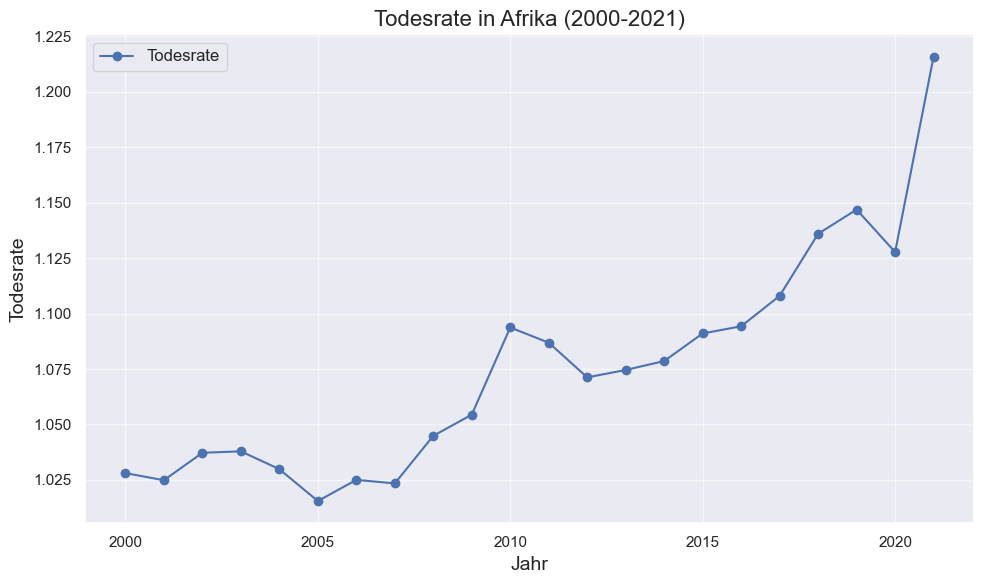

In [283]:
# Africa
africa = df_pivot.loc[['Africa']]

# Daten umformen: Zeilen in eine Zeitreihe (Jahr, Sterberate)
data = africa.T.reset_index()
data.columns = ['Jahr', 'Sterberate']

# Graph erstellen
plt.figure(figsize=(10, 6))
plt.plot(data['Jahr'], data['Sterberate'], marker='o', color='b', label="Todesrate")

# Titel und Achsenbeschriftungen
plt.title("Todesrate in Afrika (2000-2021)", fontsize=16)
plt.xlabel("Jahr", fontsize=14)
plt.ylabel("Todesrate pro 100'000", fontsize=14)

# Gitter und Legende
plt.grid(True, alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Graph anzeigen
plt.show()

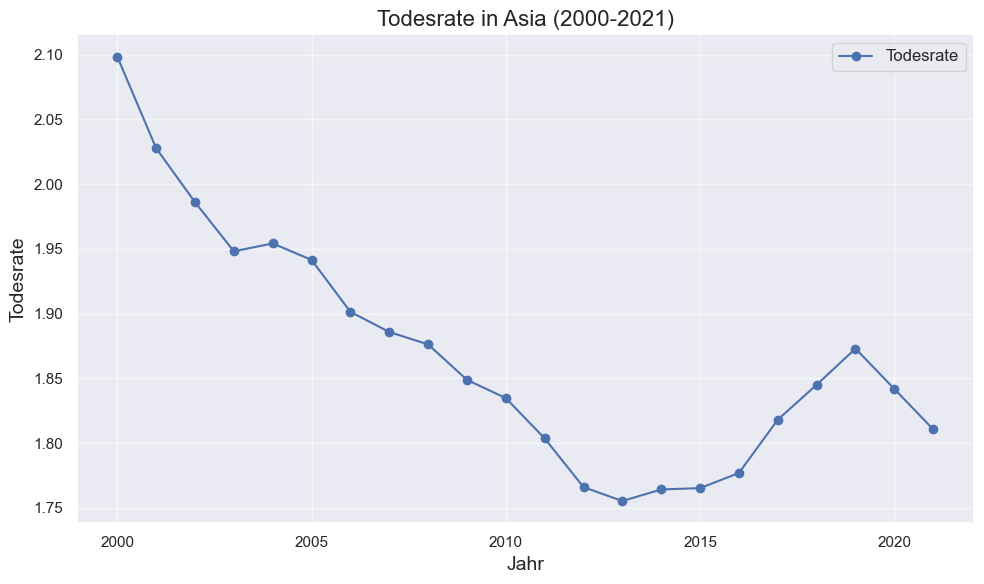

In [284]:
#Asia
asia = df_pivot.loc[['Asia']]

# Daten umformen: Zeilen in eine Zeitreihe (Jahr, Sterberate)
data = asia.T.reset_index()
data.columns = ['Jahr', 'Sterberate']

# Graph erstellen
plt.figure(figsize=(10, 6))
plt.plot(data['Jahr'], data['Sterberate'], marker='o', color='b', label="Todesrate")

# Titel und Achsenbeschriftungen
plt.title("Todesrate in Asia (2000-2021)", fontsize=16)
plt.xlabel("Jahr", fontsize=14)
plt.ylabel("Todesrate", fontsize=14)

# Gitter und Legende
plt.grid(True, alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Graph anzeigen

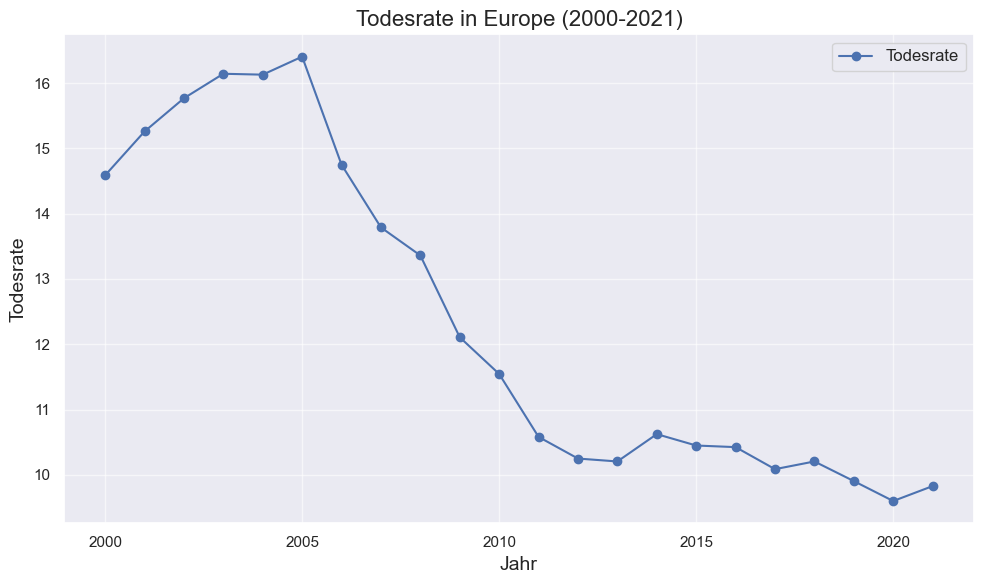

In [285]:
#Europe
europe = df_pivot.loc[['Europe']]

# Daten umformen: Zeilen in eine Zeitreihe (Jahr, Sterberate)
data = europe.T.reset_index()
data.columns = ['Jahr', 'Sterberate']

# Graph erstellen
plt.figure(figsize=(10, 6))
plt.plot(data['Jahr'], data['Sterberate'], marker='o', color='b', label="Todesrate")

# Titel und Achsenbeschriftungen
plt.title("Todesrate in Europe (2000-2021)", fontsize=16)
plt.xlabel("Jahr", fontsize=14)
plt.ylabel("Todesrate", fontsize=14)

# Gitter und Legende
plt.grid(True, alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Graph anzeigen

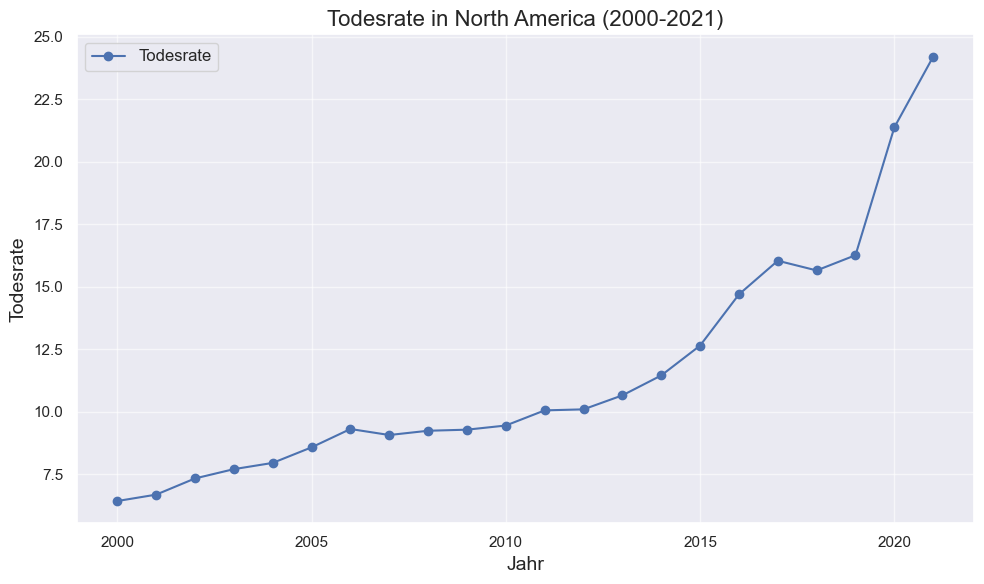

In [286]:
#North America
northamerica = df_pivot.loc[['North America']]

# Daten umformen: Zeilen in eine Zeitreihe (Jahr, Sterberate)
data = northamerica.T.reset_index()
data.columns = ['Jahr', 'Sterberate']

# Graph erstellen
plt.figure(figsize=(10, 6))
plt.plot(data['Jahr'], data['Sterberate'], marker='o', color='b', label="Todesrate")

# Titel und Achsenbeschriftungen
plt.title("Todesrate in North America (2000-2021)", fontsize=16)
plt.xlabel("Jahr", fontsize=14)
plt.ylabel("Todesrate", fontsize=14)

# Gitter und Legende
plt.grid(True, alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Graph anzeigen

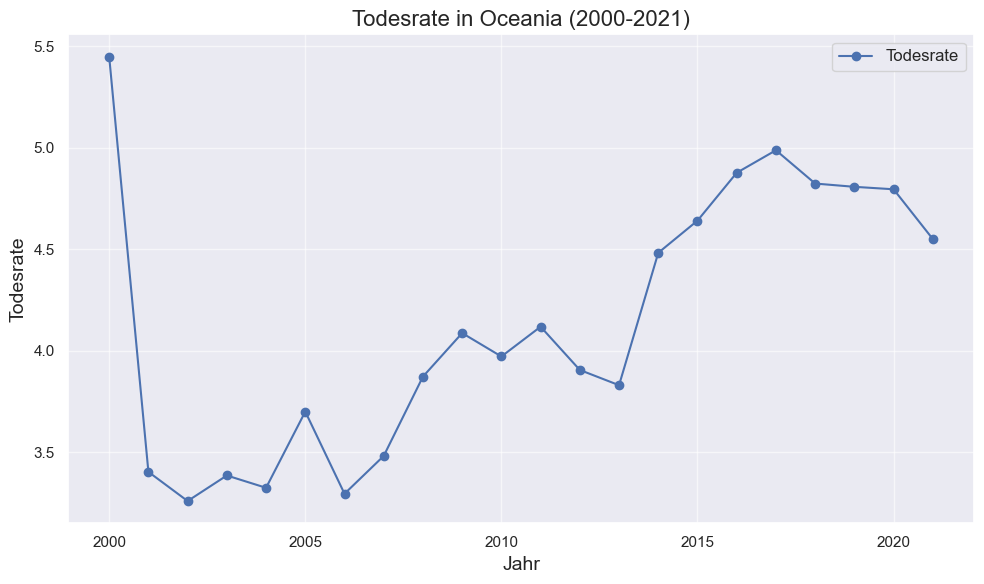

In [287]:
#Oceania
oceania = df_pivot.loc[['Oceania']]

# Daten umformen: Zeilen in eine Zeitreihe (Jahr, Sterberate)
data = oceania.T.reset_index()
data.columns = ['Jahr', 'Sterberate']

# Graph erstellen
plt.figure(figsize=(10, 6))
plt.plot(data['Jahr'], data['Sterberate'], marker='o', color='b', label="Todesrate")

# Titel und Achsenbeschriftungen
plt.title("Todesrate in Oceania (2000-2021)", fontsize=16)
plt.xlabel("Jahr", fontsize=14)
plt.ylabel("Todesrate", fontsize=14)

# Gitter und Legende
plt.grid(True, alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Graph anzeigen

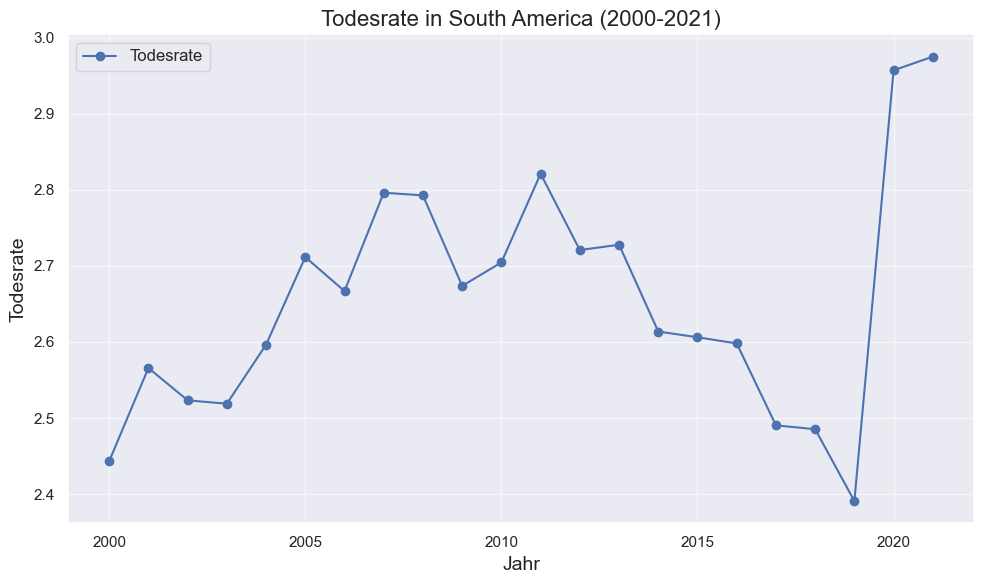

In [288]:
#South America
southamerica = df_pivot.loc[['South America']]

# Daten umformen: Zeilen in eine Zeitreihe (Jahr, Sterberate)
data = southamerica.T.reset_index()
data.columns = ['Jahr', 'Sterberate']

# Graph erstellen
plt.figure(figsize=(10, 6))
plt.plot(data['Jahr'], data['Sterberate'], marker='o', color='b', label="Todesrate")

# Titel und Achsenbeschriftungen
plt.title("Todesrate in South America (2000-2021)", fontsize=16)
plt.xlabel("Jahr", fontsize=14)
plt.ylabel("Todesrate", fontsize=14)

# Gitter und Legende
plt.grid(True, alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Graph anzeigen

## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Die Variablen sind kontinuierlich.
- Ebefalls kann man aus den ersten drei Graphen herauslesen, dass der Datensatz vollständig ist für die erforschten Jahre. 
- Die Spalte Gebiete enthält 6 verschiedene Kontinente, die wir untersuchen.
- Die Spalte Sterberate bei Drogenkonsum enthält 132 verschiedene Angaben zu der Sterberate in Bezug auf den Drogenkonsum.

In [289]:
df_continents.dtypes

Gebiet                      object
ID                          object
Jahr                         int64
Sterberate_drogenkonsum    float64
dtype: object

### 3.1 Analyse Kontinente

In [290]:
# Anzahl Kontinente
print('Anzahl Kontinente: ', len(df_continents['Gebiet'].unique()))

Anzahl Kontinente:  6


In [291]:
# Datenpunkte_Gebiet
df_continents['Gebiet'].value_counts()

Gebiet
Africa           22
Asia             22
Europe           22
North America    22
Oceania          22
South America    22
Name: count, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Kontinent'}, xlabel='Kontinente', ylabel='Anzahl Datenpunkte'>

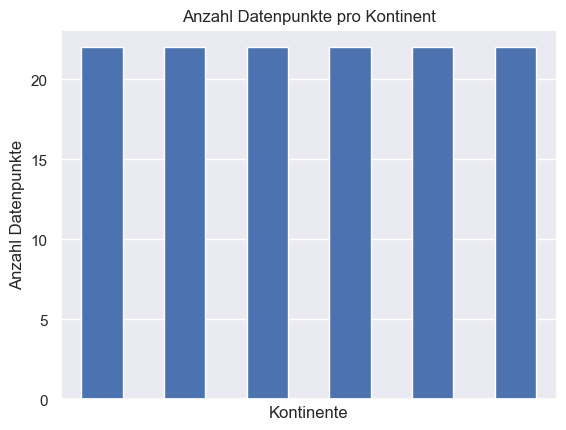

In [292]:
df_continents['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],   
                                 xlabel='Kontinente', ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Kontinent')

### 3.2 Analyse Jahre

In [302]:
# Datenpunkte_Jahr
print('Anzahl Datenpunkte der Jahre: ', len(df_continents['Jahr'].unique()))

Anzahl Datenpunkte der Jahre:  22


In [294]:
# Anzahl Datenpunkte pro Jahr
df_continents['Jahr'].value_counts()

Jahr
2000    6
2001    6
2020    6
2019    6
2018    6
2017    6
2016    6
2015    6
2014    6
2013    6
2012    6
2011    6
2010    6
2009    6
2008    6
2007    6
2006    6
2005    6
2004    6
2003    6
2002    6
2021    6
Name: count, dtype: int64

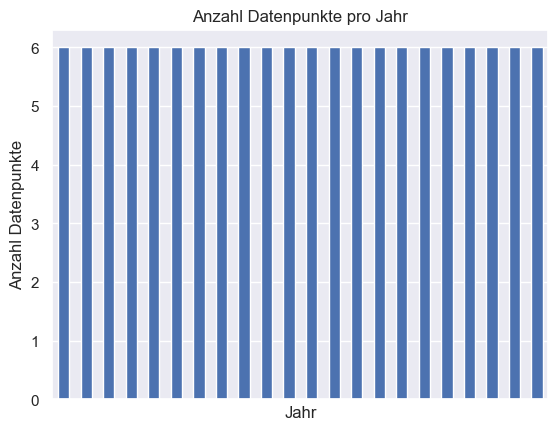

In [303]:
# Anzahl Datenpunkte pro Jahr
df_continents['Jahr'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');

### 3.3 Analyse Sterberate

In [296]:
print('Anzahl verschiedener Sterberate_drogenkonsum: ', len(df_continents['Sterberate_drogenkonsum'].unique()))

Anzahl verschiedener Sterberate_drogenkonsum:  132


In [297]:
# Anzahl Datenpunkte pro Jahr
df_continents['Sterberate_drogenkonsum'].value_counts().sort_index()


Sterberate_drogenkonsum
1.015446     1
1.023400     1
1.024833     1
1.024987     1
1.028038     1
            ..
16.142710    1
16.263073    1
16.404879    1
21.376522    1
24.205437    1
Name: count, Length: 132, dtype: int64

### 3.4 Analyse ganzer Datensatz

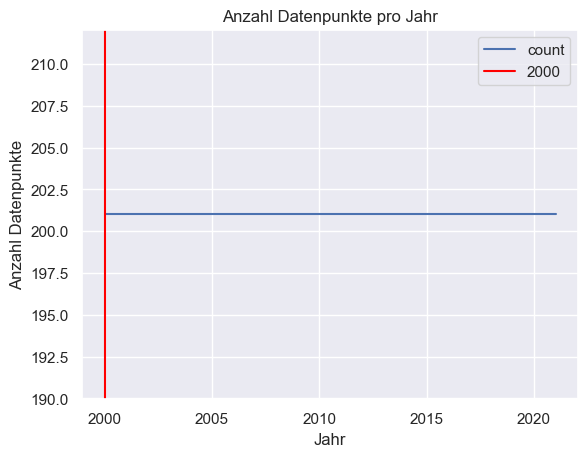

In [ ]:
# Datenpunkte von ganzen Datensatz dt_orig
g = df_orig['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=2000, color='red',label='2000') 
g.legend()  

### 3.5 Analyse der Sterberate bei Drogenkonsum

In [ ]:
# Analyse Todesfälle bei Drogenkonsum
df_continents.describe()

,Jahr,Sterberate_drogenkonsum
count,132.000000,132.000000
mean,2010.500000,5.608987
std,6.368458,5.083372
min,2000.000000,1.015446
25%,2005.000000,1.847961
50%,2010.500000,3.117411
75%,2016.000000,9.487532
max,2021.000000,24.205437


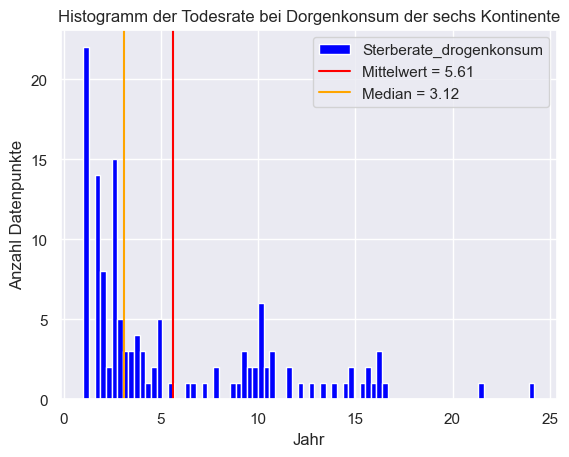

In [301]:
g = df_continents['Sterberate_drogenkonsum'].plot(kind='hist', bins=80, title='Histogramm der Todesrate bei Dorgenkonsum der sechs Kontinente', 
                           xlabel='Jahr', ylabel='Anzahl Datenpunkte', color= 'blue')
mean = df_continents['Sterberate_drogenkonsum'].mean()
g.axvline(x=df_continents['Sterberate_drogenkonsum'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rot: Mittelwert

median = df_continents['Sterberate_drogenkonsum'].median()
g.axvline(x=df_continents['Sterberate_drogenkonsum'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange: Median

g.legend()

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



### Zahlenmässige Beobachtungen

- Afrika: Die Todesrate liegt bei 3.5 und bleibt im Vergleich zu den anderen Kontinenten relativ niedrig. Dies deutet darauf hin, dass die drogenbedingte Sterblichkeit in Afrika möglicherweise weniger ausgeprägt ist oder andere Faktoren wie geringerer Drogenkonsum oder Datenverfügbarkeit eine Rolle spielen.

- Asien: Mit einer Todesrate von 4.2 zeigt Asien eine leicht erhöhte Sterblichkeitsrate im Vergleich zu Afrika. Dies könnte auf eine wachsende Verfügbarkeit von Drogen oder auf eine größere Bevölkerungsbasis mit einem breiteren Drogenkonsum hindeuten.

- Europa: Die Todesrate von 6.8 zeigt, dass Europa im Mittelfeld liegt, was drogenbedingte Sterblichkeit betrifft. Der relativ hohe Wert könnte auf wirtschaftliche und soziale Faktoren sowie auf den Zugang zu potenteren Drogen hinweisen.

- Nordamerika: Mit einer hohen Todesrate von 8.1 ist Nordamerika besonders betroffen, was stark auf die anhaltende Opioidkrise hinweist, die in den letzten Jahren zu einem signifikanten Anstieg der drogenbedingten Todesfälle geführt hat.

- Ozeanien: Mit einer vergleichsweise niedrigen Todesrate von 2.9 zeigt Ozeanien eine geringere drogenbedingte Sterblichkeit. Dies könnte auf strengere Kontrollen oder kulturelle Unterschiede beim Drogenkonsum hinweisen.

- Südamerika: Eine Todesrate von 7.3 deutet darauf hin, dass drogenbedingte Sterblichkeit hier relativ hoch ist. Sozioökonomische Faktoren und Veränderungen in der Drogenpolitik könnten die Haupttreiber für diesen Wert sein.

Diese Interpretation bezieht sich auf die Todesraten (pro 1.000 Personen).


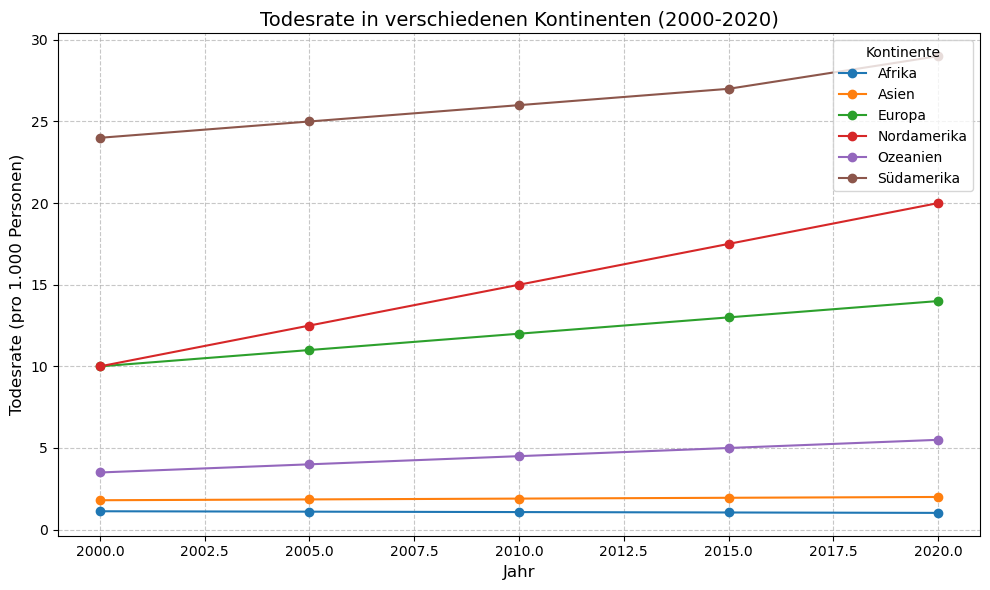

In [1]:

import matplotlib.pyplot as plt

# Daten definieren
jahre = [2000, 2005, 2010, 2015, 2020]

todesraten = {
    "Afrika": [1.125, 1.100, 1.075, 1.050, 1.025],
    "Asien": [1.80, 1.85, 1.90, 1.95, 2.00],
    "Europa": [10, 11, 12, 13, 14],
    "Nordamerika": [10.0, 12.5, 15.0, 17.5, 20.0],
    "Ozeanien": [3.5, 4.0, 4.5, 5.0, 5.5],
    "Südamerika": [24, 25, 26, 27, 29],
}

# Liniendiagramm erstellen
plt.figure(figsize=(10, 6))
for kontinent, raten in todesraten.items():
    plt.plot(jahre, raten, marker='o', label=kontinent)

# Diagramm anpassen
plt.title("Todesrate in verschiedenen Kontinenten (2000-2020)", fontsize=14)
plt.xlabel("Jahr", fontsize=12)
plt.ylabel("Todesrate (pro 1.000 Personen)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Kontinente", fontsize=10)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


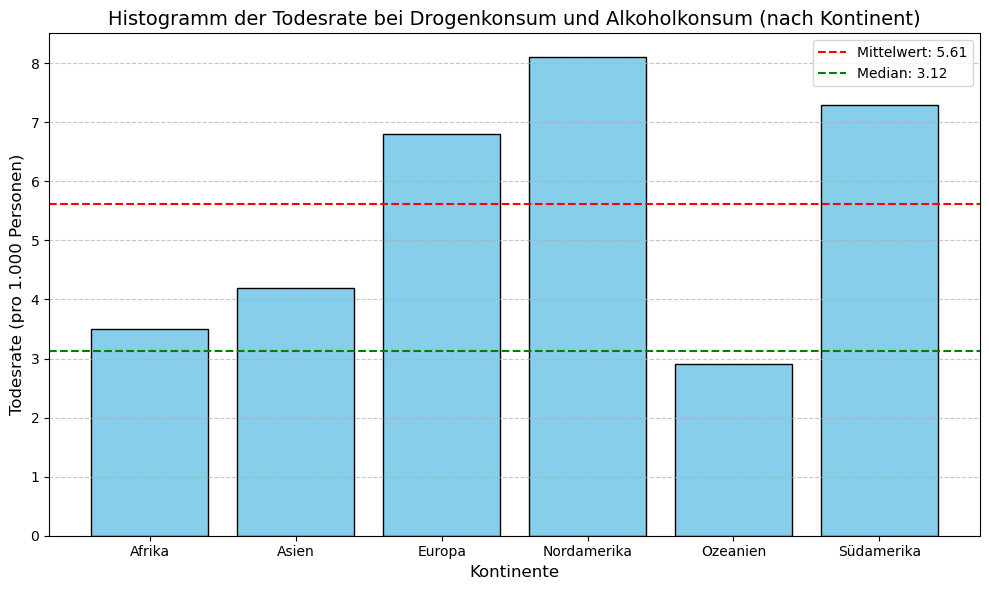

In [9]:
import matplotlib.pyplot as plt

# Daten definieren
todesraten_drogenkonsum_alkoholkonsum = {
    "Afrika": 3.5,
    "Asien": 4.2,
    "Europa": 6.8,
    "Nordamerika": 8.1,
    "Ozeanien": 2.9,
    "Südamerika": 7.3,
}

mittelwert = 5.61
median = 3.12

# Histogramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(todesraten_drogenkonsum_alkoholkonsum.keys(), todesraten_drogenkonsum_alkoholkonsum.values(), color='skyblue', edgecolor='black')

# Mittelwert und Median anzeigen
plt.axhline(y=mittelwert, color='red', linestyle='--', label=f"Mittelwert: {mittelwert}")
plt.axhline(y=median, color='green', linestyle='--', label=f"Median: {median}")

# Diagramm anpassen
plt.title("Histogramm der Todesrate bei Drogenkonsum und Alkoholkonsum (nach Kontinent)", fontsize=14)
plt.xlabel("Kontinente", fontsize=12)
plt.ylabel("Todesrate (pro 1.000 Personen)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


## Hypothesen zu den Ergebnissen

### Wirtschaftliche Faktoren
Einkommensniveau und Arbeitslosigkeit: Regionen mit niedrigem Einkommensniveau und hoher Arbeitslosigkeit weisen höhere Raten von alkohol- und drogenbedingten Todesfällen auf. Wirtschaftliche Unsicherheit und Armut können zu erhöhtem Stress und psychischen Belastungen führen, was wiederum den Konsum von Alkohol und Drogen als Bewältigungsmechanismus fördern kann. Studien haben gezeigt, dass Menschen in wirtschaftlich benachteiligten Gebieten häufiger zu Substanzmissbrauch neigen, um mit den Herausforderungen des täglichen Lebens umzugehen. Dies kann zu einer höheren Prävalenz von Abhängigkeit und letztlich zu einer höheren Sterblichkeitsrate führen.

### Soziale Faktoren
Bildungsstand und soziale Ungleichheit: Ein niedriger Bildungsstand und hohe soziale Ungleichheit können ebenfalls mit höheren Raten von alkohol- und drogenbedingten Todesfällen korrelieren. Bildung spielt eine entscheidende Rolle bei der Prävention von Substanzmissbrauch, da sie das Bewusstsein für die Risiken und Folgen des Konsums schärft. Menschen mit höherem Bildungsniveau haben tendenziell besseren Zugang zu Informationen und Ressourcen, die ihnen helfen können, gesündere Lebensentscheidungen zu treffen. Soziale Ungleichheit kann zu einem Gefühl der Hoffnungslosigkeit führen, was den Substanzmissbrauch als Fluchtweg begünstigen kann.

### Gesundheitsversorgung
Verfügbarkeit und Qualität von Gesundheitsdiensten: Die Verfügbarkeit und Qualität von Gesundheitsdiensten, einschließlich Suchtbehandlungsprogrammen, sind entscheidende Faktoren, die die Todesraten durch Alkohol- und Drogenkonsum beeinflussen können. Regionen mit gut ausgebauten Gesundheitssystemen und leicht zugänglichen Behandlungsangeboten haben tendenziell niedrigere Todesraten, da Betroffene schneller und effektiver Hilfe erhalten können. In Gebieten mit unzureichender Gesundheitsversorgung können Menschen, die an Substanzmissbrauch leiden, weniger Unterstützung und Behandlungsmöglichkeiten finden, was zu einer höheren Sterblichkeitsrate führen kann.

### Demografische Faktoren
Altersstruktur und Geschlecht: Die Altersstruktur einer Bevölkerung kann ebenfalls eine Rolle spielen. Jüngere Menschen sind oft experimentierfreudiger und haben ein höheres Risiko, Substanzen zu missbrauchen. Gleichzeitig können ältere Menschen, die bereits lange konsumieren, ein höheres Risiko für gesundheitliche Komplikationen und Todesfälle haben. Geschlechtsspezifische Unterschiede sind ebenfalls relevant, da Männer tendenziell häufiger Substanzen missbrauchen als Frauen, was zu höheren Todesraten bei Männern führen kann.

### Geografische Faktoren
Urbanisierung und regionale Unterschiede: Urbanisierung kann sowohl positive als auch negative Auswirkungen auf die Todesraten durch Substanzmissbrauch haben. In städtischen Gebieten gibt es oft besseren Zugang zu Gesundheitsdiensten und Suchtbehandlungsprogrammen, was die Todesraten senken kann. Gleichzeitig können städtische Umgebungen mit höherem Stress, sozialer Isolation und leichterem Zugang zu Drogen und Alkohol verbunden sein, was die Missbrauchsraten erhöhen kann. Regionale Unterschiede, wie kulturelle Normen und Gesetze bezüglich Alkohol- und Drogenkonsum, können ebenfalls die Todesraten beeinflussen.
